In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
%matplotlib inline

In [2]:
PATH = r'../data/raw/diabetes.csv'

In [3]:
df=pd.read_csv(filepath_or_buffer=PATH)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking The Data

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

    The data looks clean. So we can start with the analysis.

### Basic EDA

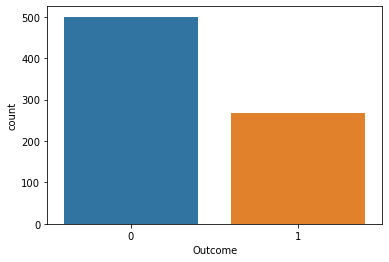

In [6]:
sns.countplot(x='Outcome', data=df)
plt.show()

### Brief Analysis of the data

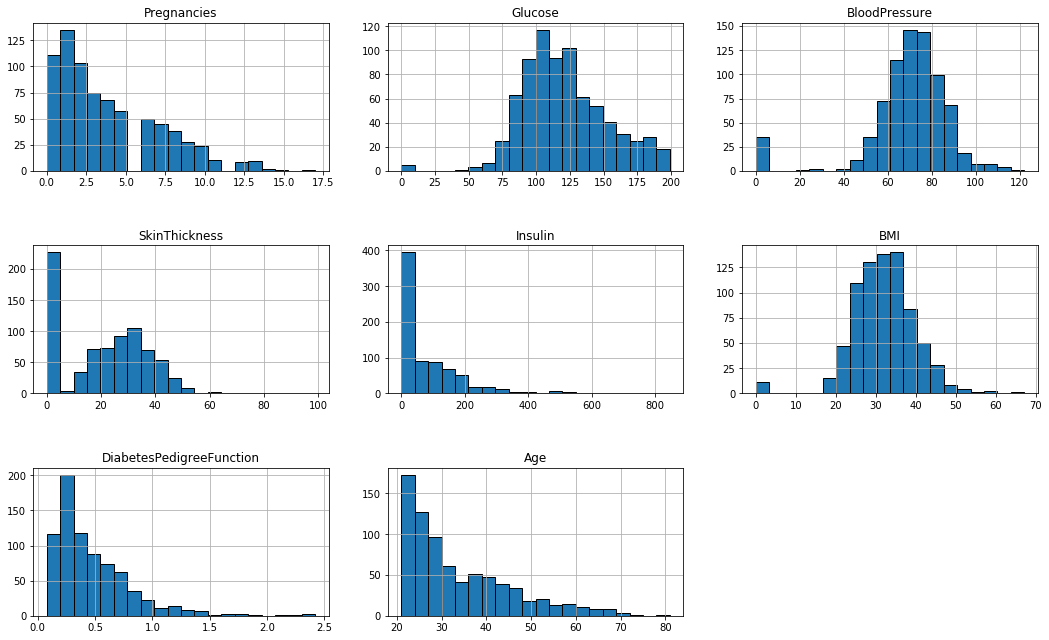

In [7]:
columns=df.columns[:8]
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

### Analysis Of Diabetic Cases

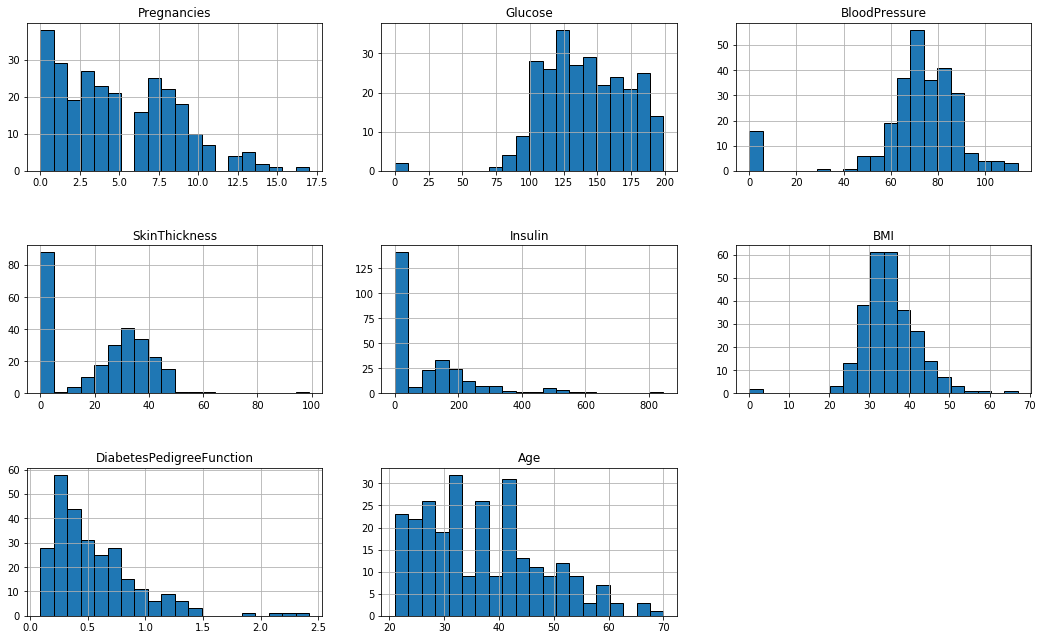

In [8]:
df1 = df[df['Outcome']==1]
columns = df.columns[:8]
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df1[i].hist(bins=20, edgecolor='black')
    plt.title(i)
plt.show()

### Pair Plots:
Lets us see the distribution of the features in the dataset

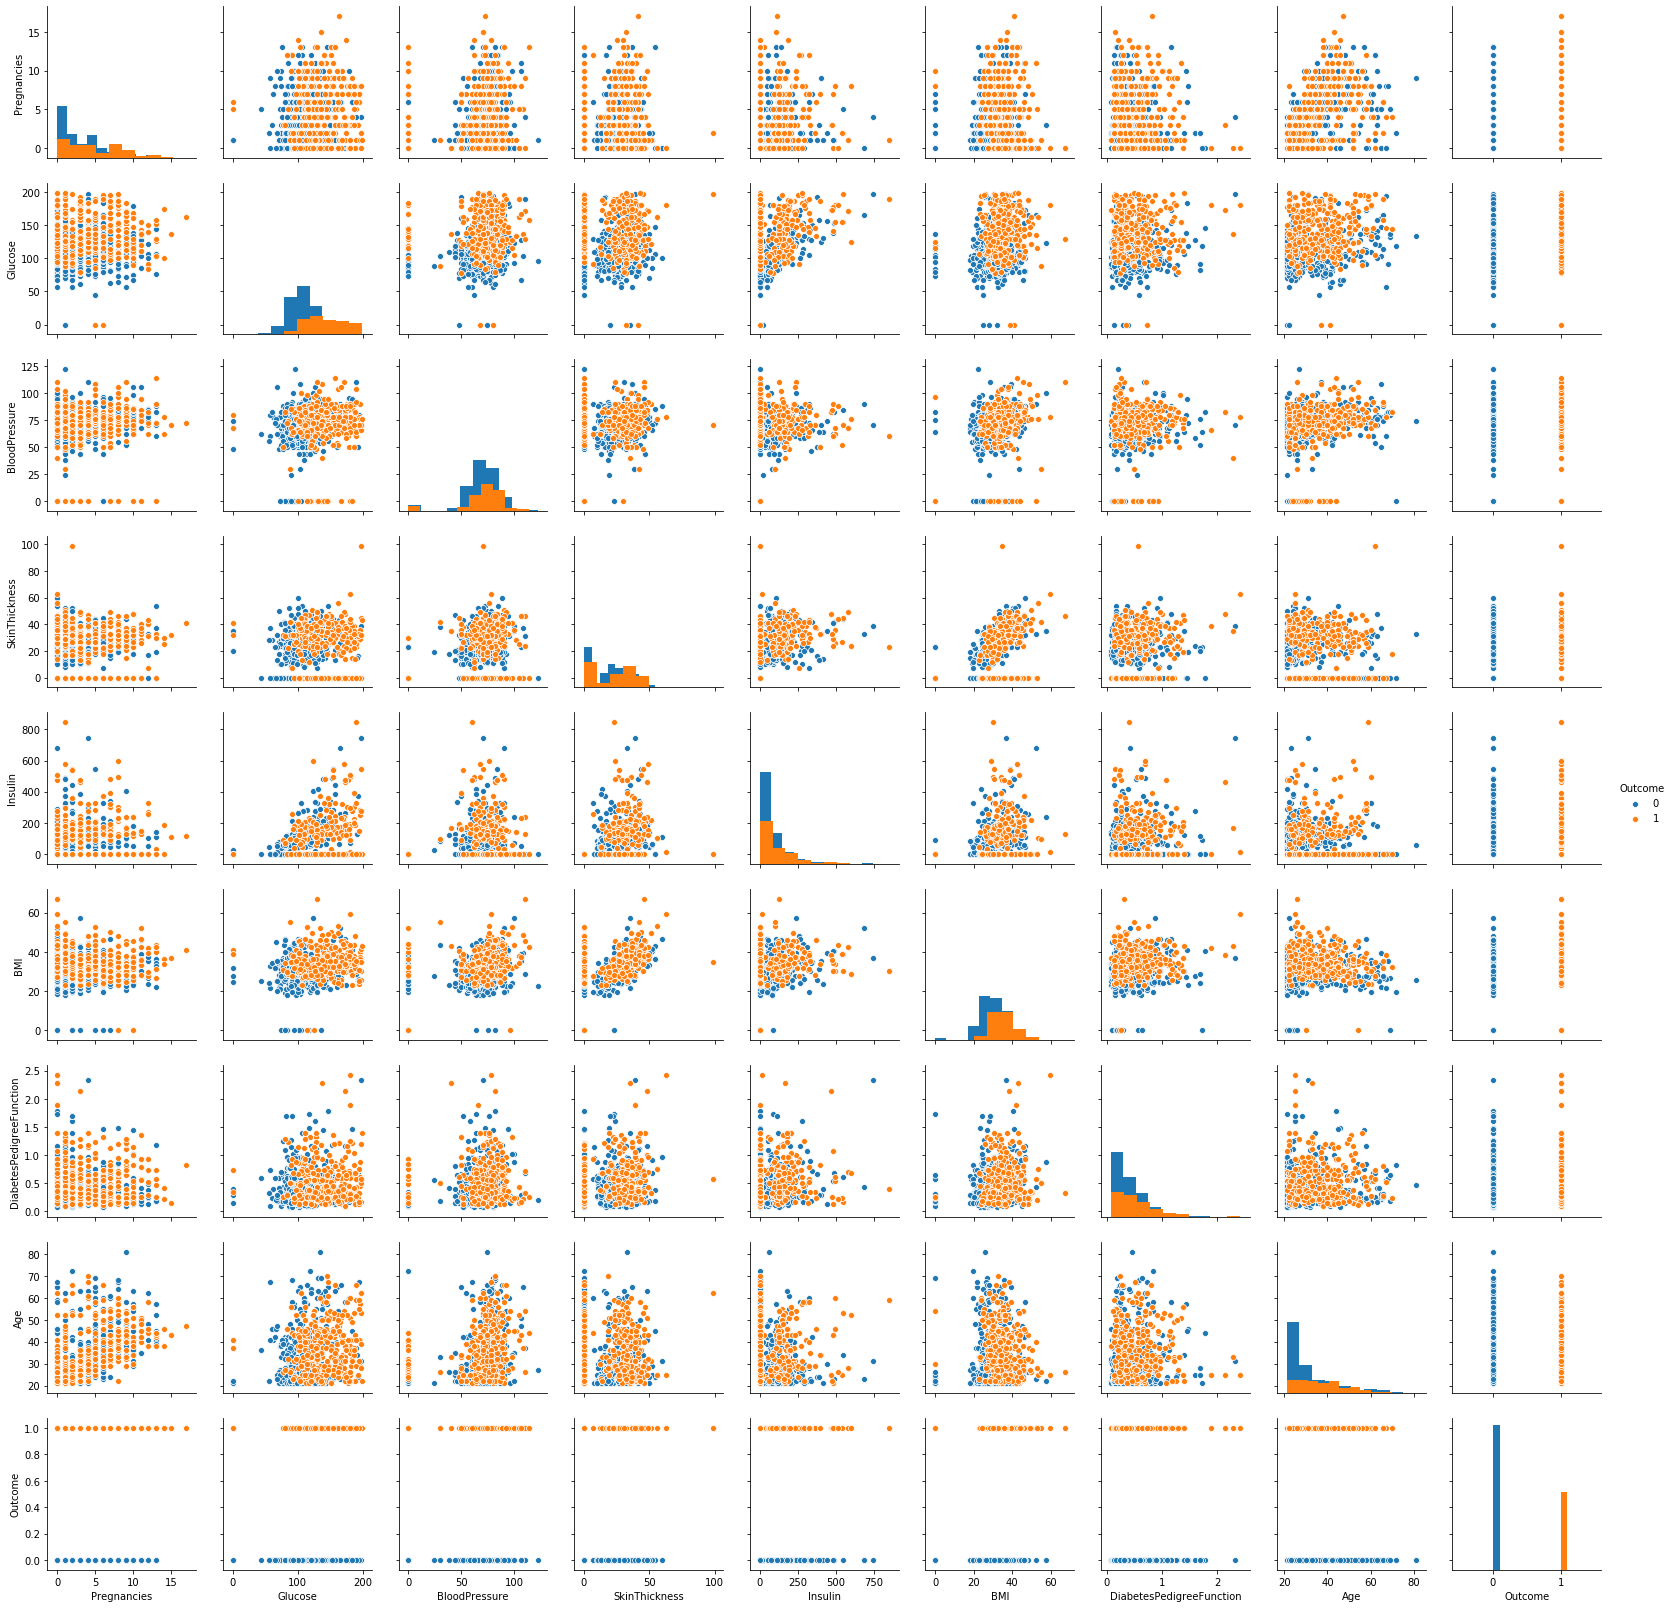

In [9]:
sns.pairplot(data=df, diag_kind='hist', hue='Outcome')
plt.show()

### Observations:
    1.The diagonal shows the distribution of the the dataset with the kernel density plots.

    2.The scatter-plots shows the relation between each and every attribute or features taken pairwise. Looking at the scatter-plots, we can say that no two attributes are able to clearly seperate the two outcome-class instances.

### Let's Do Some Predictive Modeling

In [10]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Stratification:
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [11]:
outcome = df['Outcome']
data = df[df.columns[:8]]
train, test = train_test_split(df, test_size=0.25, random_state=0, stratify=df['Outcome']) # stratify the outcome
train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]
train_Y = train['Outcome']
test_Y = test['Outcome']

In [12]:
train_X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1,80,74,11,60,30.0,0.527,22
453,2,119,0,0,0,19.6,0.832,72


In [13]:
train_Y.head(2)

432    0
453    0
Name: Outcome, dtype: int64

## SVM

In [14]:
types = ['rbf','linear']
for i in types:
    model = svm.SVC(kernel=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    print('Accuracy for SVM kernel = ', i, 'is', metrics.accuracy_score(prediction, test_Y))

Accuracy for SVM kernel =  rbf is 0.6510416666666666
Accuracy for SVM kernel =  linear is 0.7708333333333334


## Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Logistic Regression is  0.7760416666666666


## Decision Tree

In [16]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Decision Tree is  0.7552083333333334


## K-Nearest Neighbours

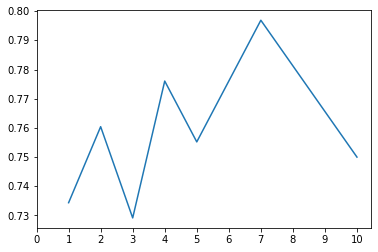

Accuracies for different values of n are :  [0.734375   0.76041667 0.72916667 0.77604167 0.75520833 0.77604167
 0.796875   0.78125    0.765625   0.75      ]


In [17]:
a_index = list(range(1,11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are : ', a.values)

## In a Nutshell

In [18]:
abc = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=3),
          DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction, test_Y))
models_dataframe = pd.DataFrame(abc, index=classifiers)   
models_dataframe.columns = ['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.770833
Radial Svm,0.651042
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.750000


    The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. I will do these things in subsequent parts.

## Feature Extraction/ Selection:
    1 A lot many features can affect the accuracy of the algorithm.

    2 Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.

    3 It reduces training time and reduces overfitting

    4 We can choose important features in 2 ways:

        a Correlation matrix--> selecting only the uncorrelated features.

        b RandomForestClassifier--> It gives the importance of the features

### Correlation Matrix

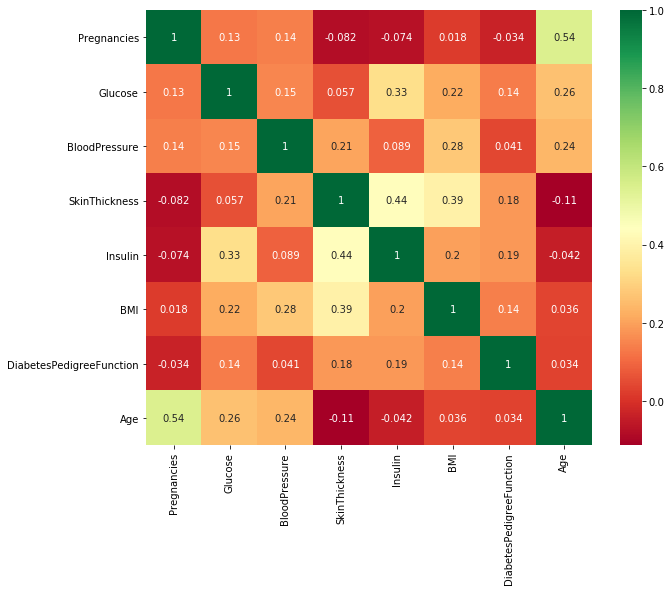

In [19]:
sns.heatmap(df[df.columns[:8]].corr(), annot=True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### bservations:
    1 All the features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

### Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100, random_state=0)
X=df[df.columns[:8]]
Y=df['Outcome']
model.fit(X, Y)
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

### Observations:
1) The important features are: Glucose, BMI, Age, DiabetesPedigreeFunction

### Standardisation
There can be a lot of deviation in the given dataset. An example in the dataset can be the BMI where it has 248 unique values. This high variance has to be standardised. Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

    Using Only Important Features And Standardisation

In [21]:
df2 = df[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [22]:
from sklearn.preprocessing import StandardScaler #Standardisation

In [23]:
features = df2[df2.columns[:4]]
features_standard = StandardScaler().fit_transform(features)# Gaussian Standardisation
x = pd.DataFrame(features_standard, columns = ['Glucose','BMI','Age','DiabetesPedigreeFunction'])
x['Outcome'] = df2['Outcome']
outcome = x['Outcome']
train1,test1 = train_test_split(x,test_size=0.25, random_state=0, stratify=x['Outcome'])
train_X1 = train1[train1.columns[:4]]
test_X1 = test1[test1.columns[:4]]
train_Y1 = train1['Outcome']
test_Y1 = test1['Outcome']

In [24]:
abc=[]
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(),
          KNeighborsClassifier(n_neighbors=3),
          DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X1, train_Y1)
    prediction = model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction, test_Y1))
new_models_dataframe=pd.DataFrame(abc, index=classifiers)   
new_models_dataframe.columns = ['New Accuracy']   

In [25]:
new_models_dataframe = new_models_dataframe.merge(models_dataframe, left_index=True, right_index=True, how='left')
new_models_dataframe['Increase'] = new_models_dataframe['New Accuracy'] - new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.781250,0.770833,0.010417
Radial Svm,0.770833,0.651042,0.119792
Logistic Regression,0.776042,0.776042,0.000000
KNN,0.729167,0.729167,0.000000
Decision Tree,0.729167,0.750000,-0.020833


    The above dataframe shows the new accuracy of the models after feature selection. We can see that the Accuarcy for linear Svm increases by 1% whereas it increases about 12% for Radial Svm. For LR the accuracy decreases

### Cross Validation
Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

    1) The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

    2) Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

    3) We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

    4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [26]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation

In [27]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [28]:
xyz=[]
accuracy=[]
classifiers=['Linear Svm',
             'Radial Svm',
             'Logistic Regression',
             'KNN',
             'Decision Tree']
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=3),
        DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model, x[x.columns[:4]], x['Outcome'], cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame(abc, index=classifiers)   
new_models_dataframe2.columns = ['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.781250
Radial Svm,0.770833
Logistic Regression,0.776042
KNN,0.729167
Decision Tree,0.729167


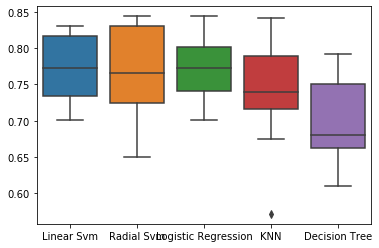

In [29]:
box = pd.DataFrame(accuracy, index=classifiers)
sns.boxplot(data = box.T)
plt.show()

    The above boxplot shows that SVM and LR perform the best while Decision Tree performs the worst.

### Ensembling
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. The models used to create such ensemble models are called ‘base models’.

We will do ensembling with the Voting Ensemble. Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

We will be using weighted Voting Classifier. We will assign to the classifiers according to their accuracies. So the classifier with single accuracy will be assigned the highest weight and so on.

In our case, we will use the Top 3 classifiers i.e Linaer SVM, Radial(rbf) SVM and Logistic Regression classifiers.

In [30]:
linear_svc = svm.SVC(kernel='linear', C=0.1, gamma=10, probability=True)
radial_svm = svm.SVC(kernel='rbf', C=0.1, gamma=10, probability=True)
lr = LogisticRegression(C=0.1)

In [31]:
from sklearn.ensemble import VotingClassifier # for Voting Classifier

### Linear and Radial SVM

In [32]:
ensemble_lin_rbf = VotingClassifier(estimators=[('Linear_svm',linear_svc),
                                                ('Radial_svm', radial_svm)], 
                                    voting='soft', weights=[2,1]).fit(train_X1, train_Y1)
print('The accuracy for Linear and Radial SVM is : ', ensemble_lin_rbf.score(test_X1, test_Y1))

The accuracy for Linear and Radial SVM is :  0.7760416666666666


### Linear SVM with Logistic Regression

In [33]:
ensemble_lin_lr = VotingClassifier(estimators = [('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                                   voting='soft', weights=[2,1]).fit(train_X1, train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is : ', ensemble_lin_lr.score(test_X1, test_Y1))

The accuracy for Linear SVM and Logistic Regression is :  0.78125


### Logistic Regression with Radial SVM

In [34]:
ensemble_rad_lr = VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                                   voting='soft', weights=[1,2]).fit(train_X1, train_Y1)
print('The accuracy for Radial SVM and Logistic Regression is : ', ensemble_rad_lr.score(test_X1, test_Y1))

The accuracy for Radial SVM and Logistic Regression is :  0.78125


### All 3 classifiers combined

In [35]:
ensemble_rad_lr_lin = VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2, 1, 3]).fit(train_X1, train_Y1)
print('The ensembled model with all the 3 classifiers is : ', ensemble_rad_lr_lin.score(test_X1, test_Y1))

The ensembled model with all the 3 classifiers is :  0.7760416666666666


    So the maximum Accuracy which we could get by using ensemble models is 78.125%.